In [1]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
SAVE_FIGS = True

In [2]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
CWD = os.getcwd()
from reporting import *
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
plots_path = os.path.join(ROOT_DIR, "publication", "paper", "final_plots", "results", "fit_categorization")
np.random.seed(0)

In [3]:
main_df.columns

Index(['group', 'dataset', 'subset', 'transform', 'orientation', 'channel',
       'dataset_type', 'obs_var', 'var_lower', 'var_upper', 'total_samples',
       'initial_r', 'initial_eta', 'best_r', 'best_eta', 'best_scale',
       'kstest_stat_initial', 'kstest_stat_cutoff_0.05', 'kstest_stat_best',
       'n_pval_0.05', 'obs_kurt', 'kurt_lower', 'kurt_upper', 'intersect_roi',
       'hull_area', 'hull_r_lower', 'hull_r_upper', 'hull_beta_lower',
       'hull_beta_upper', 'param_gaussian', 'kstest_stat_gaussian',
       'kstest_pval_gaussian', 'param_laplace', 'kstest_stat_laplace',
       'kstest_pval_laplace', 'param_t', 'kstest_stat_t', 'kstest_pval_t',
       'kstest_pval_gengamma', 'github_plot', 'total_samples.1',
       'beat_all_priors', 'best_prior', 'failure_category', 'failure_type',
       'which_ones', 'best_beta'],
      dtype='object')

In [4]:
filtered_df = main_df[["group", "dataset", "subset", "transform", "orientation", "subset", "channel", "kstest_stat_best", "best_r", "best_eta"]]
filtered_df = filtered_df[filtered_df["kstest_stat_best"] <= 0.005]

filtered_df.sort_values(["best_r", "best_eta"]).tail(30)

,group,dataset,subset,transform,orientation,subset,channel,kstest_stat_best,best_r,best_eta
982,14,pastis,full,fourier,NaN,full,green,0.002333,1.23,1.20
966,32,pastis,full,fourier,NaN,full,blue,0.001572,1.28,0.80
598,4,coco,indoor,wavelet,vertical,indoor,blue,0.002558,1.29,-0.90
2024,5,syntheticMRI2D,coronal,wavelet,diagonal,coronal,NaN,0.001391,1.31,0.00
606,4,coco,indoor,wavelet,vertical,indoor,gray,0.002714,1.32,-0.80
862,4,coco,outdoor,wavelet,diagonal,outdoor,blue,0.003440,1.40,-1.01
1465,3,segmentAnything,full,wavelet,diagonal,full,green,0.002790,1.40,-0.56
1181,4,pastis,full,wavelet,diagonal,full,red,0.003818,1.40,-0.46
879,5,coco,outdoor,wavelet,diagonal,outdoor,green,0.004500,1.50,-1.09
614,4,coco,indoor,wavelet,vertical,indoor,green,0.002366,1.50,-0.84


pastis full fourier gray
r = 0.1, eta = 12, scale = 5.7233525819476764e-24, group = 29, n = 1376940
coco indoor wavelet diagonal red
r = 20.0, eta = -1, scale = 231.20356733079743, group = 4, n = 25664


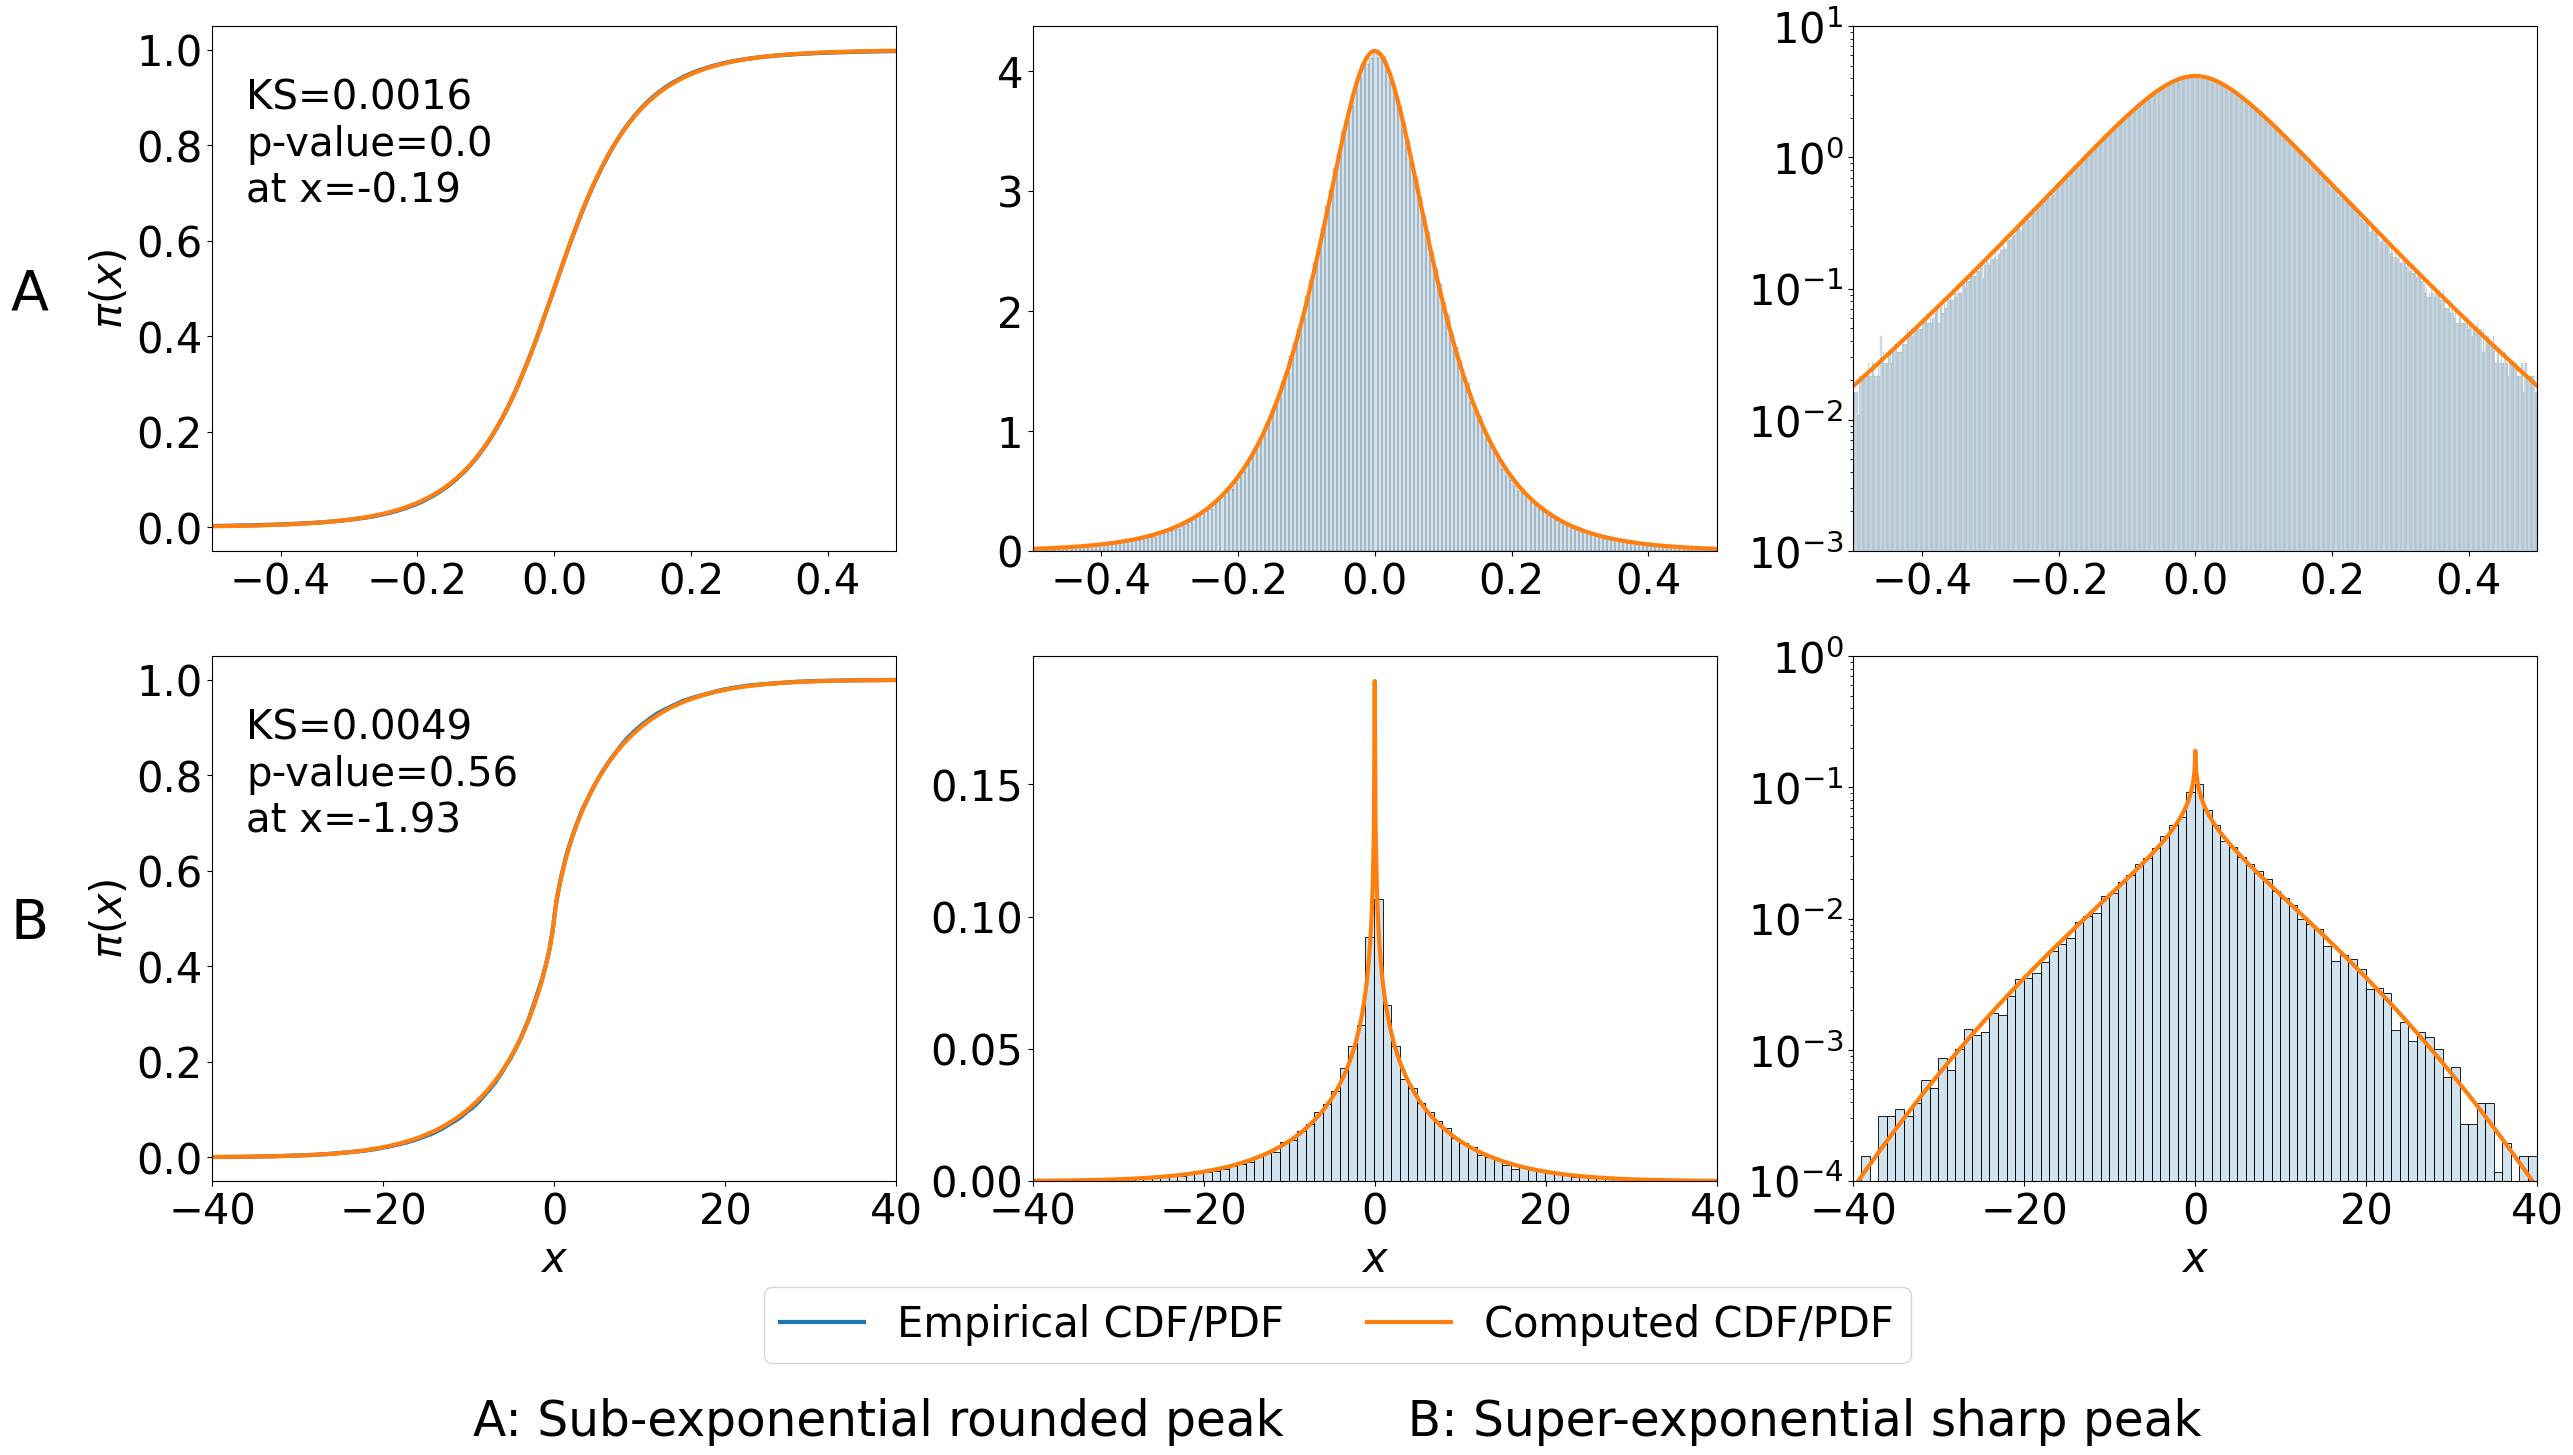

In [5]:
names = ["Sub-exponential rounded peak", "Super-exponential sharp peak"]
DATA_NAMES = ['pastis-full','coco-indoor', 'coco-indoor', 'spaceNet-full'] 
TRANSFORMS = ['fourier','wavelet-diagonal', 'wavelet-vertical', 'learned']
CHANNELS = ['gray', "red", "green", '']

r1s, eta1s, scale1s = [0.1, 20.00, 0.08, 0.3], [12, -1, 0.4, -1.07], [5.7233525819476764e-24, 231.20356733079743, 3.272e-20, 2.927]
groups= [29, 4, 9, 49]
n_samples = 5000
xlims = [0.5, 40, 0.3, 10]

Letters = ['A', 'B', 'C', 'D']

fig, axes = plt.subplots(2, 3, figsize=(30, 15))

for i in range(2):
    
    DATA_NAME = DATA_NAMES[i]
    TRANSFORM = TRANSFORMS[i]
    CHANNEL = CHANNELS[i]
    r1, eta1, scale1 = r1s[i], eta1s[i], scale1s[i]
    group = groups[i]
    ax1, ax2, ax3 = axes[i]
    xlim = xlims[i]

    path_list = DATA_NAME.split("-") + TRANSFORM.split("-")
    if CHANNEL:
        path_list.append(CHANNEL)

    #print(f"Name the notebook:\n{'_'.join(path_list[::-1])}.ipynb")
    FULL_DATA_NAME='-'.join(path_list)

    group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{FULL_DATA_NAME}.pickle'))
    group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{FULL_DATA_NAME}-size.pickle'))


    sample = group_data_map[group]
    sample_size = group_total_samples[group]
    
    print(' '.join(path_list))
    print(f"r = {r1}, eta = {eta1}, scale = {scale1}, group = {group}, n = {sample_size}")
    params1 = (r1, eta1, scale1)
    log_scale = True


    distro='gengamma'
    log_scale=True
    n_samples=5000
    interval=None
    provided_loc=None
    group=None
    percent_excluded=0.1
    plot_hist=True
    bw=0.05
    bw_log=0.05
    binwidth=None
    sample = sample 
    fontsize=30
    linewidth=3

    if i ==0:
        interval=[-1, 1]
    if i == 1:
        binwidth=1
        interval=[-40, 40]
    

    def compute_cdf_pdf(params):
        if distro == 'gengamma':
            if len(params) == 3:
                r, eta, scale = params
            else:
                r, eta = params
                scale = 1
            xs_pdf, null_cdf = compute_prior_cdf(r=r, eta=eta, scale=scale, n_samples=n_samples, enforce_assert=False, debug=False, return_xs=True)

            null_pdf = null_cdf.derivative()(xs_pdf)
        elif distro == 'gaussian' or distro == 'normal':
            null_cdf = stats.norm(scale=params).cdf
            xs_pdf = np.linspace(-30, 30, 10000)
            null_pdf = stats.norm(scale=params).pdf(xs_pdf)
        elif distro == 'laplace':
            null_cdf = stats.laplace(scale=params).cdf
            xs_pdf = np.linspace(-30, 30, 10000)
            null_pdf = stats.laplace(scale=params).pdf(xs_pdf)
        return xs_pdf, null_cdf, null_pdf

    xs_pdf1, null_cdf1, null_pdf1 = compute_cdf_pdf(params1)


    if len(sample) > 0:
        lower_bound = np.percentile(sample, percent_excluded / 2)
        upper_bound = np.percentile(sample, 100 - percent_excluded / 2)
        original_sample = sample
        sample = sample[(sample > lower_bound) & (sample < upper_bound)]
        sample = np.sort(sample)
        n = len(sample)
        if interval is None:
            interval = (np.percentile(sample, 0.5), np.percentile(sample, 99.5))
        xs = np.linspace(max(interval[0], np.min(sample)), min(np.max(sample), interval[1]), 20000000)
        #print(max(interval[0], np.min(sample)), min(np.max(sample), interval[1]))

    if log_scale:
        

        if interval:
            ax1.set_xlim(left=interval[0], right=interval[1])

        if len(sample) > 0:
            ax1.plot(sample, np.arange(1, n + 1) / n, label='Empirical CDF/PDF', linewidth=linewidth)
            result1 = stats.ks_1samp(original_sample, null_cdf1)
            distance1, location1 = result1.statistic, np.round(result1.statistic_location, 2)
        
            #paramtext1 = rf"$r={params1[0]}, \eta={params1[1]}, \vartheta={np.format_float_scientific(params1[2], precision=2)}$"
            pvalue = stats.kstwo.sf(distance1, sample_size)
            location1 = round(float(location1), 2)
            ax1.text(
                0.05, 0.9, 
                f"KS={np.round(distance1, 4)} \np-value={np.round(pvalue, 2)}\nat x={location1} ", 
                transform=ax1.transAxes, 
                fontsize=fontsize -1, 
                verticalalignment='top', 
                horizontalalignment='left'
            )
            
            #print(location1)
            ax1.plot(xs, null_cdf1(xs),  linewidth=linewidth, label='Computed CDF/PDF')

        if interval:
            ax2.set_xlim(left=interval[0], right=interval[1])

        if len(sample) > 0:
            #sns.kdeplot(sample[(sample >= interval[0]) & (sample <= interval[1])], bw_method=bw, ax=ax2, label=f'Empirical PDF (KDE, bw={bw})', linewidth=linewidth)
            if plot_hist:
                sns.histplot(sample, ax=ax2, binwidth=binwidth, stat='density', label=f'Empirical PDF ({100 - percent_excluded}% of sample)', alpha=0.2)
                xs_knn = np.linspace(interval[0], interval[1], 30000)

            

                #ax2.plot(xs_knn, f_knn, linewidth=linewidth, label='kNN density')
        ax2.plot(xs_pdf1, null_pdf1, label='Computed PDF (params1)', linewidth=linewidth, color= "tab:orange")


        if interval:
            ax3.set_xlim(left=interval[0], right=interval[1])
        ax3.set_ylim(bottom=10**-3, top=0.1)

        if len(sample) > 0:
            #sns.kdeplot(ax=ax3, x=sample, bw_method=bw_log, log_scale=[False, True], label=f"Empirical PDF (KDE, bw={bw_log})", linewidth=linewidth)
            if plot_hist:
                sns.histplot(sample, ax=ax3, binwidth=binwidth, stat="density", log=True, bins=1000, alpha=0.2, color='#1f77b4', label=f'Empirical PDF ({100 - percent_excluded}% of sample)')
                xs_knn = np.linspace(interval[0], interval[1], 30000)

            
                #ax3.plot(xs_knn, f_knn, linewidth=linewidth, label='kNN density')

        ax3.plot(xs_pdf1, null_pdf1, label="Computed PDF (params1)", linewidth=linewidth, color= "tab:orange")

        # Move legend outside the plot and make it common for all subplots
        #handles, labels = ax1.get_legend_handles_labels()
        #fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.52, -0.05), ncol=4, fontsize=fontsize, markerscale=50)

        ax1.tick_params(axis='both', which='major', labelsize=fontsize)
        ax2.tick_params(axis='both', which='major', labelsize=fontsize)
        ax3.tick_params(axis='both', which='major', labelsize=fontsize)

        ax1.set_ylabel(r"$\pi(x)$", fontsize=fontsize)
        ax2.set_ylabel("")
        ax3.set_ylabel("")

        if i == 0:
            ax3.set_ylim(bottom=10**-3, top=10)
        elif i == 1:
            ax3.set_ylim(bottom=10**-4, top=1)
        elif i == 3:
            ax3.set_ylim(bottom=10**-3, top=1)

       

        ax1.set_xlim((-xlim, xlim))
        ax2.set_xlim((-xlim, xlim))
        ax3.set_xlim((-xlim, xlim))

        ax1.text(
        -0.24, 0.49, Letters[i],
        transform=ax1.transAxes,
        fontsize=fontsize+10,
        #fontweight='bold',
        va='center',
        ha='right'
    )

        #plt.tight_layout()
ax1.set_xlabel(r"$x$", fontsize=fontsize)
ax2.set_xlabel(r"$x$", fontsize=fontsize)
ax3.set_xlabel(r"$x$", fontsize=fontsize)

fig.text(
    0.5, -0.05,
    "        ".join([f"{letter}: {name}" for letter, name in zip(Letters, names)]),
    ha='center',
    va='center',
    fontsize=fontsize + 5
)
# Add a single legend at the bottom for blue and orange lines
handles, labels = axes[0][0].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.025), 
    ncol=2, 
    fontsize=fontsize
)
if SAVE_FIGS:
    save_path = os.path.join(plots_path, "best_hits_plot.jpg")
    plt.savefig(save_path, dpi=DPI, bbox_inches='tight')

plt.show()




